<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Online-customer-segmentation/blob/main/Online_customers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Online Retail Customer Segmentation.**

# **Problem Description**
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Data Description**

**Attribute Information:**

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description: **Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

# **Importing libs and data**

In [1]:
# importing libraris for data manipulation and plotting
import pandas as pd
import datetime as dt
import numpy as np
# import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
#importing kmeans
from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

In [6]:
# for 3D plots
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
# for silhouette plots
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [8]:
# ignoring warning for now
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [11]:
# Top 5 rows and columns of data set
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# Shape of Data set in the form of rows and columns
df.shape

(541909, 8)

In [13]:
# Check Description of data set
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
# Let's check Description of data set with another way
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [15]:
 #Check Information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
# Let's Check Number of Unique values for each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [17]:
# Check duplicate values Present in data set
len(df[df.duplicated()])

5268

# **NULL Values Handling:**

In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('----'*25)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


From above we can see that Description 0.27% and Customer Id have 24.93% null values
So, we remove null *values* 

Text(0.5, 1.0, ' Visulaizing Missing Values')

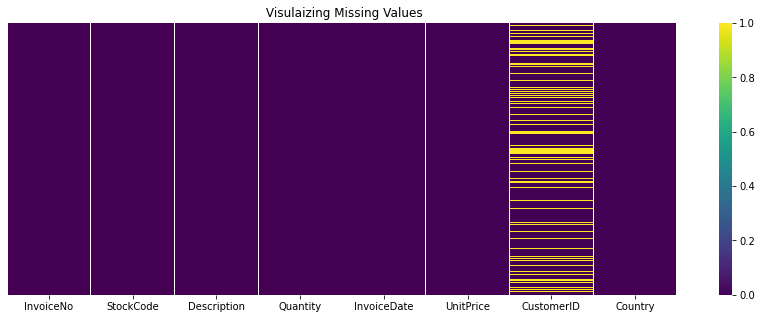

In [20]:
# Let's Visulaizing Null values  With the help of heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='viridis',annot=False,yticklabels=False)
plt.title(" Visulaizing Missing Values")

Missing values in CustomerID and Description column.

Customer Id is identification column ,

null values in column wont effect in analysis , so we will drop all null values

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(406829, 8)

In [23]:
# So, Let's check null values after removing null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now, there are no null values

# **Duplicate values:**

In [24]:
# Check duplicate values present in our data
df.duplicated().sum()

5225

We have seen that, there are 5225 Rows duplicate values present in our data,

So, we will decided to remove this duplicate rows.

In [25]:
df=df[~df.duplicated()]

In [26]:
# After removing duplicate values 
# Let's check the shape of data
df.shape

(401604, 8)

In [27]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Here we can see that min value for Quantity column is negative.

UnitPrice has 0 as min value

Need to Explore these columns

In [29]:
# Let's check dataframe have negative values in quantity

df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Now, Here we See that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop

In [30]:
# Changing the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [31]:
# String to be searched in start of string 
search ="C"

  
# Boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)

  
# Displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [32]:
cancel_order.shape

(8872, 8)

In [33]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

2.209141343213713

**Cancel order percentage 2.209% , so we remove the cancel order data**

In [34]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [35]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7501
1,Germany,453
2,EIRE,247
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


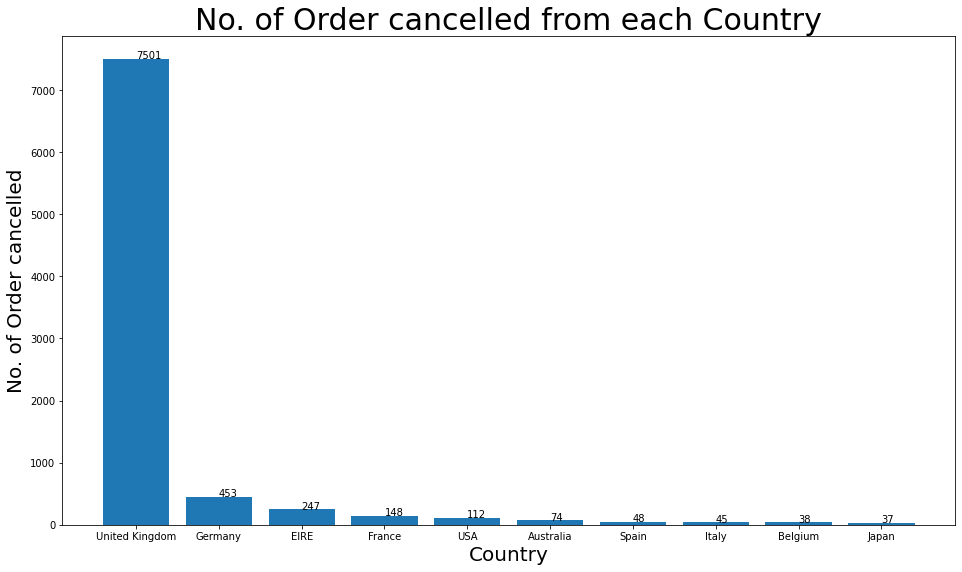

In [36]:
# Figure Size
plt.figure(figsize=(16,9))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# Creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [37]:
# Also If Invoice No starts with C means it's a cancellation. We need to drop this entries.
df=df[~df['InvoiceNo'].str.contains('C')]

In [38]:
# Let's  Check how many values are present for unitprice==0

len(df[df['UnitPrice']==0])

40

**There are exact 40 values are present so will drop this values**

In [39]:
# Taking unitprice values greater than 0.
df=df[df['UnitPrice']>0]
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [40]:
df.shape

(392692, 8)

In [41]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# **Feature Engineering:**

In [42]:
print(df[df['InvoiceDate']=='12/13/10 9:02'].index.values)

[26732 26733 26734 26735 26736 26737 26738 26739 26740 26741 26742 26743
 26744 26745 26746 26747 26748]


In [43]:
# Converting Invoice Date to datetime. 
# Invoice Date is in format of 01-12-2010 08:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m-%d-%Y %H:%M")

In [44]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [46]:
# Extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [47]:
# Extracting day from the Invoice date
df['Day']=df['InvoiceDate'].dt.day_name()

In [48]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [49]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [50]:
df.year.unique()

array([2010, 2011])

# **Exploratory Data Analysis:**

**Top country based on customer count** 

In [51]:
top_5_countries=df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})

In [52]:
# Let's choose top 5 country based on customer 
top_5_countries.head()

,Country,Customer_count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


In [53]:
# Let's choose bottom 5 country based on customer 
top_5_countries.tail()

,Country,Customer_count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


Text(0.5, 0, 'Country Name')

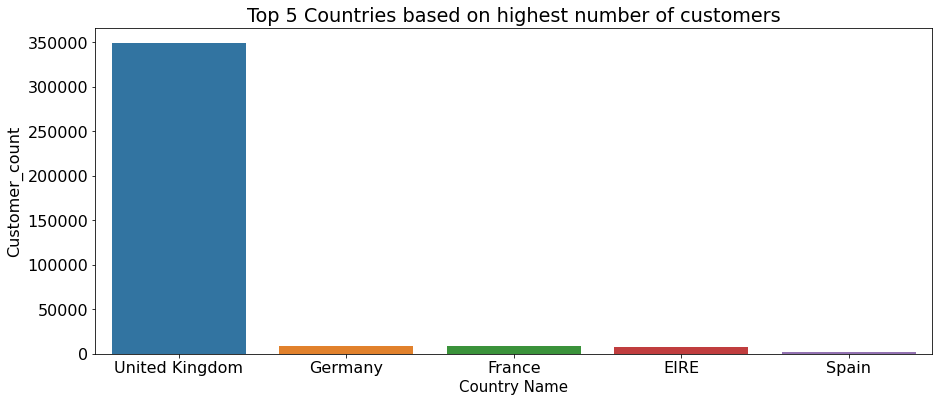

In [54]:
# Let's see Top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')
plt.xlabel("Country Name",fontsize='15')

# **Top product based on description:**

In [55]:
top_5_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'})

In [56]:
# Let's check Top 5 products 
top_5_product.head(5)

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


In [57]:
# Let's check bottom 5 products
top_5_product.tail(5)

,Product_name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Top 5 products')

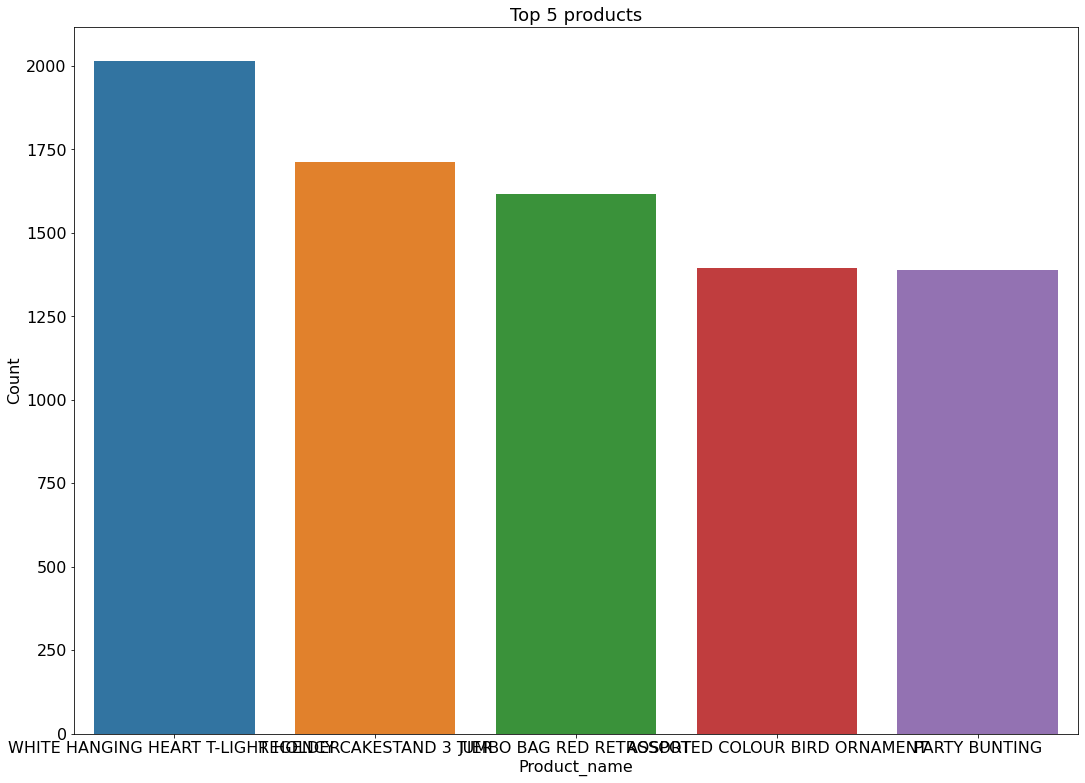

In [58]:
# Now, Check Top 5 product in terms of description
plt.figure(figsize=(18,13))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_5_product['Product_name'].head(),y=top_5_product['Count'])
plt.title('Top 5 products',fontsize='18')

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER.

2.REGENCY CAKESTAND 3 TIER.

3.JUMBO BAG RED RETROSPOT.

4.ASSORTED COLOUR BRID ORNAMENT.

5.PARTY BUNTING.

**Bottom Five product:**

In [59]:
bottom_5_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(5)
bottom_5_product

,Product_name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Bottom 5 products')

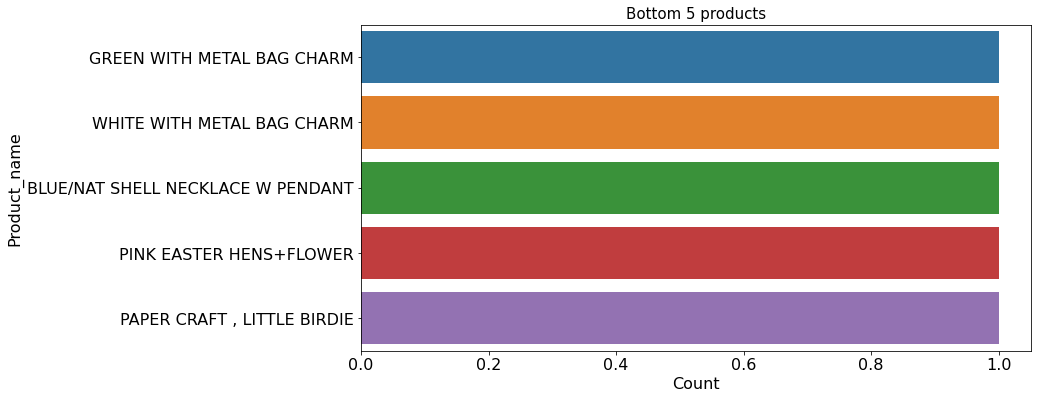

In [60]:
# Ten bottom product in terms of description
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=bottom_5_product['Count'],y=bottom_5_product['Product_name'])
plt.title('Bottom 5 products', fontsize='15')

**Bottom Five Product based on the selling are:**

1.Green with Metal Bag Charm

2.White with Metal Bag Charm

3.Blue/Net Shell Necklace W Pendant

4.Pink Easter Hens+ Flower

5.Paper Craft, Little Birdie

**TOP FIVE ITEM IN TERMS OF STOCK CODE**

In [61]:
top_5_StockCodes=df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(5)
top_5_StockCodes

,StockCode,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


Text(0.5, 1.0, 'Top 5 products in terms of Stock Code')

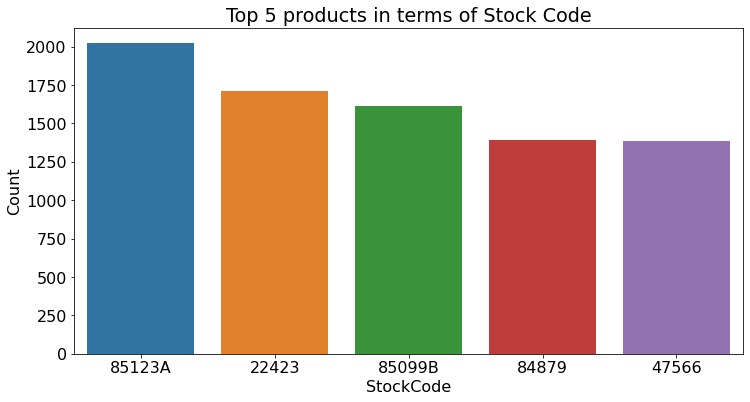

In [62]:
# Top Ten product in terms of Stcok Code
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_5_StockCodes['StockCode'],y=top_5_StockCodes['Count'])
plt.title('Top 5 products in terms of Stock Code')

**Top Five Stocks name based on selling are :**

85123A

22423

85099B

84879

47566

**Top Ten customer who are more frequent:**

In [63]:
top_10_customers=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677
5,15311.0,2366
6,14646.0,2076
7,13089.0,1814
8,13263.0,1667
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 frequent Customers.')

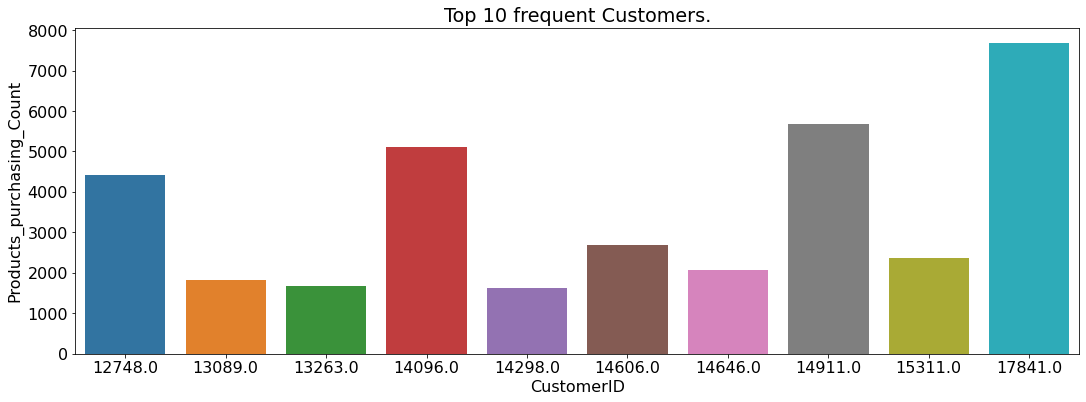

In [64]:
# Top Ten frequent Customers
plt.figure(figsize=(18,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

**Observation:**

CustomerID- 17841 had purchased highest number of products

CustomerID-14911 is the 2nd higest customer who purchased the most the products

**Sales in month:**

In [65]:
sales_in_month = df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


Text(0.5, 1.0, 'Sales count in different Months ')

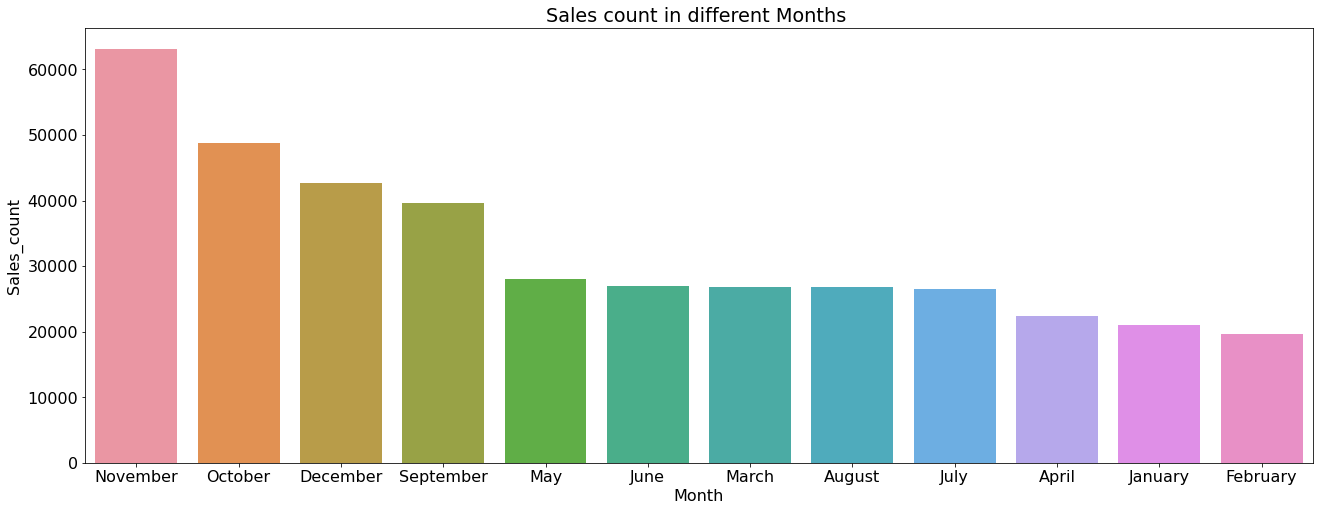

In [66]:
# Sales count in different months.
plt.figure(figsize=(22,8))
plt.rcParams['font.size'] = '16'
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

**Observations:**

Most of the sale happened in November month.

February Month had least sales.

**Sales in week days:**

In [67]:
sales_on_day_basis = df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


Text(0.5, 1.0, 'Sales count on different Days ')

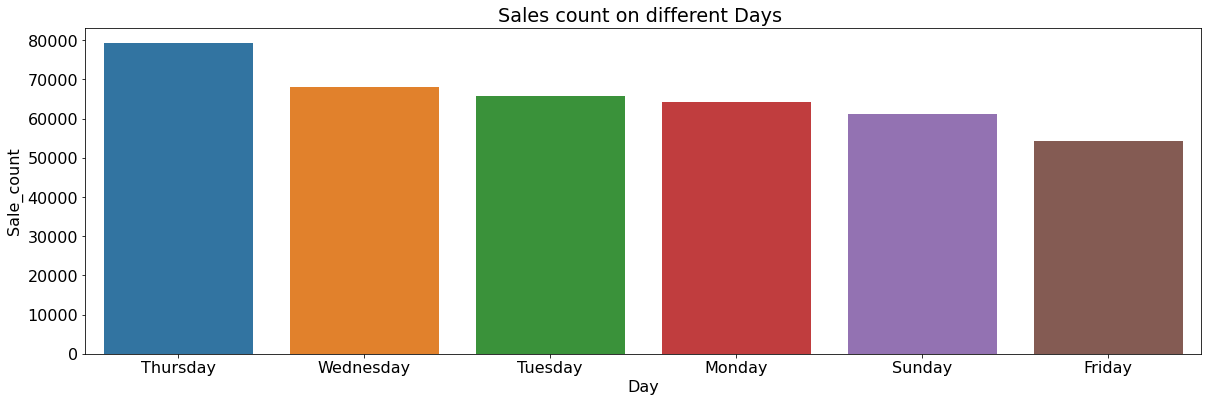

In [68]:
# Sales count on different days.
plt.figure(figsize=(20,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

**Observation:**

1)Sales On Thursdays are high.

2)Sales On Fridays are less

**Hourly Sales:**

In [69]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [70]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening' 

In [71]:
df['Day_time_type']=df['hour'].apply(time)

In [72]:
sales_timing=df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

,Day_time_type,Sales_count
0,Afternoon,268654
1,Morning,117132
2,Evening,6906


Text(0.5, 1.0, 'Sales count in different day timings')

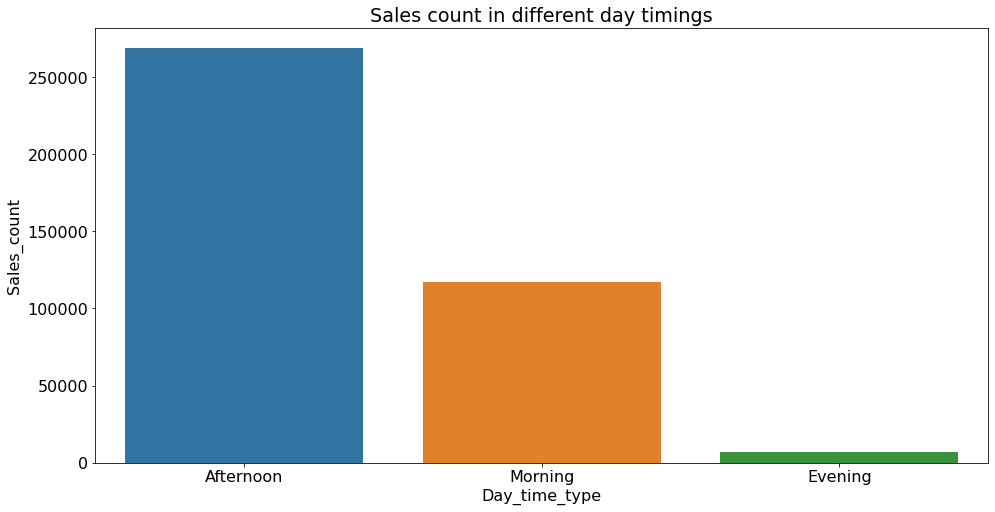

In [73]:
# Sales count on different days.
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = '16'
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')

**Observations:**

1)Most of the sales happens in the afternoon.

2)Least sales happens in the evening.

**Average amount by customers:**

In [74]:
avg_amount=df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
#avg_amount.sort_values('Avg_amount_per_customer',ascending=False)

Text(0.5, 1.0, 'Average amount spent by each Customer')

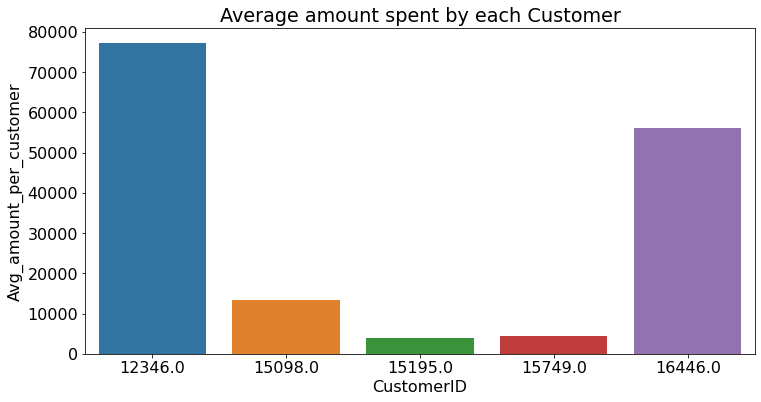

In [75]:
# Sales count on different days.
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(5))
plt.title('Average amount spent by each Customer')

Here ,

1)Customer ID 12346 Average amount spent by each customer is high

2)customer ID 15195 and 15749 amount spent by each customer is low